## Linear Regression

The linear regression is one of the most well-known models in the context of machine learning, involving fitting a linear model to data whose predictors (features) are highly correlated with the target value to be estimated. It can be implemented through the Stochastic Gradient Descent algorithm: an iterative optimization algorithm for the parameters of the regression function based on minimizing the cost (or loss) function. This minimization is achieved by calculating the negative gradient of the cost function with respect to the parameters of the regression function (weights and bias).

With n features, the model is in the form:

$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + ... + w_{m}x_{m} + b$

Where $\hat{y}$ is the estimative (or prediction) of the label $y$, given the values of the features $x_{1}, x_{2},...,x_{m}$, $(w_{1}, w_{2},...,w_{m})$ is the set of weights associated to the features and $b$ is called bias.

$loss = \frac{1}{n}\sum_{i = 1}^{n} (\hat{y_{i}} - y_{i})^2$

As we aim to minimize the loss of our model, we should make the parameters vary in the direction of the negative gradient of f (this is the principle of the Stochastic Gradient Descent algorithm).

In this context, let's call $\theta = (w_{1}, w_{2}, ... , w_{m}, b)$. Additionally, we define the hyperparameter $\alpha$ as the learning rate of the model, analogous to the previous model.

Thus, through stochastic gradient descent, the new value of $\theta$, $\theta'$, is given by the formula:

$\theta' = \theta - \alpha \cdot \nabla f(w_{1}, w_{2}, ... , w_{m}, b)$

Where $\nabla f(w_{1}, w_{2}, ... , w_{m}, b) = (\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},..., \frac{\partial f}{\partial w_{m}}, \frac{\partial f}{\partial b})$ is the gradient of f.

Calculating the partial derivatives:
e
$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, for each feature $x_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

We obtain the values of weights and bias after one iteration:

$w_{k}' = w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, for each feature $x_{k}$.

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

We will modify the previous model and add the complexity term to the cost function, defining it by the $L_{2}$ regularization formula. This term is given by:

$L_{2}$ regularization term = $ \sum_{i = 1}^{m} w_{i}^{2}$

We define $\lambda$ as the regularization coefficient, a model hyperparameter that multiplies the complexity function. The higher $\lambda$, the greater the regularization effect on complexity, meaning more penalization for very large weights on features. Thus, the new function to minimize in the model is:

$f(\theta)$ = Loss + $\lambda$ Complexity = $\frac{1}{n} \sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})^{2} + \lambda \sum_{i = 1}^{m} w_{i}^{2}$

Whose partial derivatives are given by:

$\frac{\partial f}{\partial w_{k}} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i} + 2\lambda w_{k}$, for all features $x_{k}$ with weight $w_{k}$.

$\frac{\partial f}{\partial b} = \frac{2}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

Thus, we obtain the new values of weight and bias after one iteration:

$w_{k}' = (1 - 2 \alpha \lambda)\;w_{k} - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i}) \cdot (x_{k})_{i}$, for all features $x_{k}$ with weight $w_{k}$.

$b' = b - \frac{2 \alpha}{n}\sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})$

### Importing Libraries

In [1]:
import sys
sys.path.append('../../..')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from machine_learning.model_implementation.utils.model_implementation_utils import *
from linear_regressor import LinearRegressor
from linear_regression_parameters import LinearRegressionParameters
from linear_regression_utils import *

### Importing Data

We are going to use the dataset "Data for Admission in the University", available in Kaggle:

https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

In [2]:
data = import_data()
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Shuffle, Split and Scaling

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocess(data)

### Defining Parameters

In [4]:
random_state = 0
parameters = LinearRegressionParameters()
parameters.initial_weights = np.zeros(len(data.columns) - 1)
parameters.epochs = 50
parameters.batch_size = 40
parameters.random_state = random_state

In [5]:
print(parameters)

alpha = 0.1
batch_size = 40
epochs = 50
gamma_reg = 0.0
initial_bias = 0
initial_weights = [0. 0. 0. 0. 0. 0. 0.]
lambda_reg = 0.1
random_state = 0


### Verifying Correlations

This is only done in the training data, because it's in this data that the model will be based to avoid data leakage.

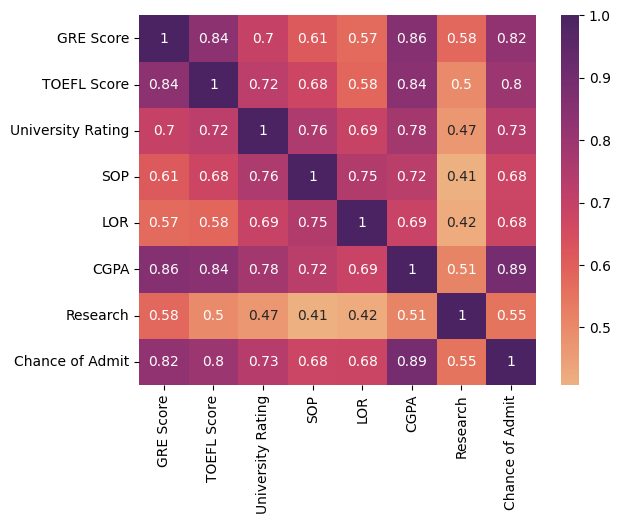

In [6]:
plot_correlations(X_train, y_train)

### Training a Model

In [7]:
model = LinearRegressor(parameters)
model.fit(X_train, y_train, False)

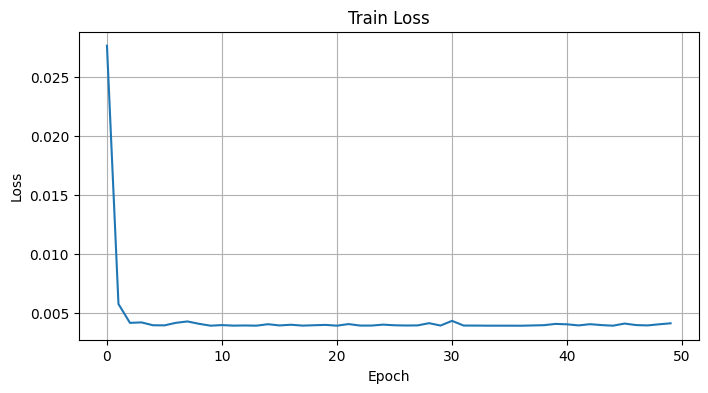

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(model.get_train_loss())
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

### Validation

Choosing the best value of lambda (regularization hyperparameters), i.e., the one which generates the lowest loss in validation.

In [9]:
models = {}
lambdas = [round(x, 2) for x in np.arange(0, 1.05, 0.05)]
val_losses = []
for lambda_reg in lambdas:
    parameters = LinearRegressionParameters()
    parameters.lambda_reg = lambda_reg
    parameters.initial_weights = np.zeros(len(data.columns) - 1)
    parameters.epochs = 50
    parameters.batch_size = 20
    model = LinearRegressor(parameters)
    model.fit(X_train, y_train)
    models[lambda_reg] = model
    val_losses.append(loss(model, X_val, y_val))

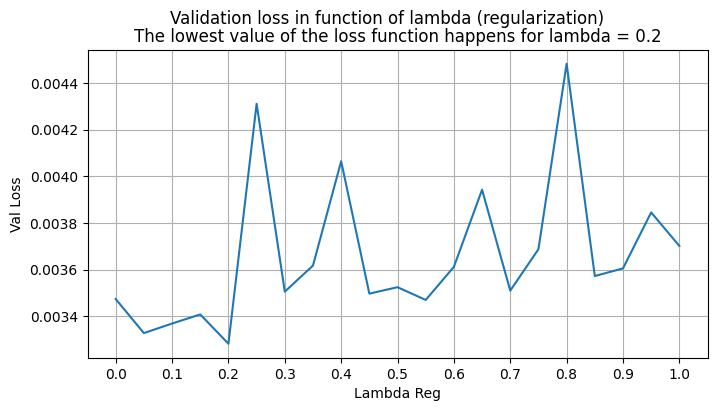

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(lambdas, val_losses)
plt.suptitle("Validation loss in function of lambda (regularization)")
plt.title(f"The lowest value of the loss function happens for lambda = {lambdas[np.argmin(val_losses)]}")
plt.xlabel("Lambda Reg")
plt.ylabel("Val Loss")
plt.xticks([x for x in np.arange(0, 1.1, 0.1)])
plt.grid()


For analysis, let's also examine how the value of weights changes as a function of lambda. As we know from L2 regularization, the value of weights should generally decrease as lambda increases.

Text(0, 0.5, 'Weight')

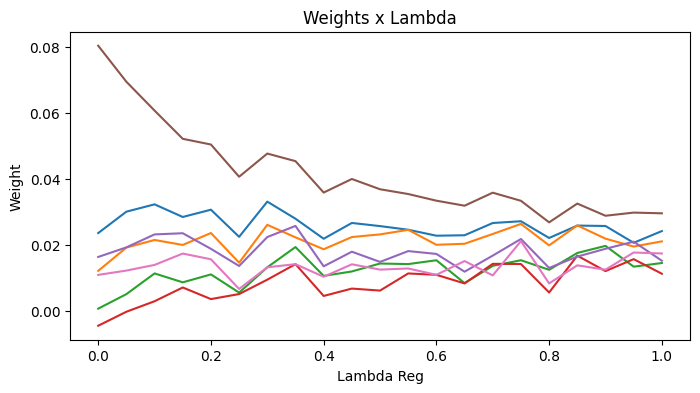

In [11]:
weights = []
for i in range(0, len(X_train.columns)):
    weights_i = []
    for key, model in models.items():
        weights_i.append(model.get_weights()[i])
    weights.append(weights_i)

plt.figure(figsize=(8, 4))
for i in range(0, len(X_train.columns)):
    plt.plot(lambdas, weights[i])
plt.title('Weights x Lambda')
plt.xlabel('Lambda Reg')
plt.ylabel('Weight')

### Test


With lambda = 0.1, let's finally determine the value of the cost function on the test set.

In [12]:
parameters = LinearRegressionParameters()
parameters.lambda_reg = 0.1
parameters.initial_weights = np.zeros(len(data.columns) - 1)
parameters.epochs = 50
parameters.batch_size = 20

selected_model = LinearRegressor(parameters)
selected_model.fit(X_train, y_train)
loss(selected_model, X_test, y_test)

0.005447974972281055